#Redes Neuronales 2020-1
##Taller 2: Parte 1

Tema 13. No tiene sentido usar una red convolucional para aprendizaje de secuencias, su error será siempre mayor que el de una red recurrente.

Haremos comparaciones de desempeño utilizando una cantidad similar de parametros entrenables entre una red convolucional y una red recurrente para 2 dataset reales y uno artificial

In [ ]:
import numpy as np
import pandas as pd
import nltk
from random import randint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Conv1D, MaxPool2D, MaxPool1D, LSTM, Input
#from tensorflow.keras import layers
from keras.utils import to_categorical, plot_model
from sklearn import preprocessing
from IPython.display import Image

#Dataset 1: IMDB Movie Reviews

In [ ]:
# This model training code is directly from:
# https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py

'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, Flatten
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [ ]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


## Red Convolucional

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 80, 128)           2560000   
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 80, 32)            8224      
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 80, 16)            2064      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 40, 16)            0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 640)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 8)                 5128      
_________________________________________________________________
dense_54 (Dense)             (None, 1)               

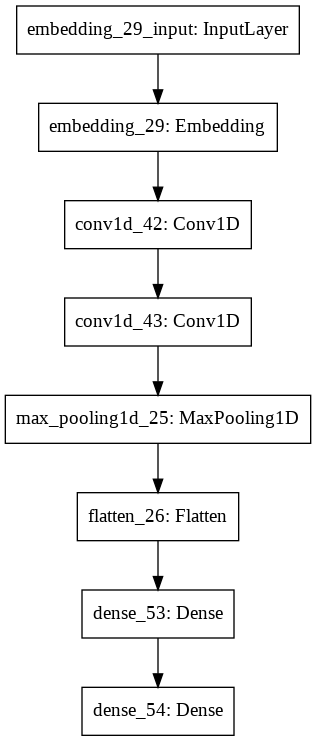

In [ ]:
modelIMDBCnn = Sequential()
modelIMDBCnn.add(Embedding(max_features, 128, input_length=80, trainable = True))
modelIMDBCnn.add(Conv1D(filters=32, kernel_size = 2, padding="same", activation="relu"))
modelIMDBCnn.add(Conv1D(filters=16, kernel_size = 4, padding="same", activation="relu"))
modelIMDBCnn.add(MaxPooling1D(pool_size=2))
modelIMDBCnn.add(Flatten())
modelIMDBCnn.add(Dense(8, activation="relu"))
modelIMDBCnn.add(Dense(1, activation="sigmoid"))

modelIMDBCnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelIMDBCnn.summary()
plot_model(modelIMDBCnn, to_file='shared_input_layer.png')
Image(filename='shared_input_layer.png')

In [ ]:
print('Train...')
batch_size = 32
historyIMDBCnn = modelIMDBCnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = modelIMDBCnn.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 9s 378us/step - loss: 0.2119 - accuracy: 0.9184 - val_loss: 0.3608 - val_accuracy: 0.8444
Epoch 2/5
25000/25000 [==============================] - 9s 364us/step - loss: 0.0864 - accuracy: 0.9698 - val_loss: 0.4854 - val_accuracy: 0.8321
Epoch 3/5
25000/25000 [==============================] - 9s 373us/step - loss: 0.0224 - accuracy: 0.9939 - val_loss: 0.6526 - val_accuracy: 0.8306
Epoch 4/5
25000/25000 [==============================] - 9s 366us/step - loss: 0.0062 - accuracy: 0.9989 - val_loss: 0.8860 - val_accuracy: 0.8252
Epoch 5/5
25000/25000 [==============================] - 2s 84us/step
Test score: 1.0333283465445042
Test accuracy: 0.8267199993133545


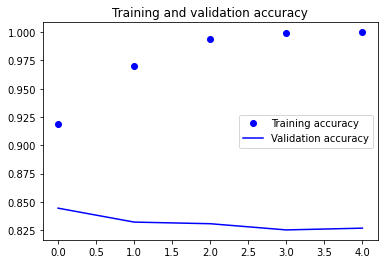

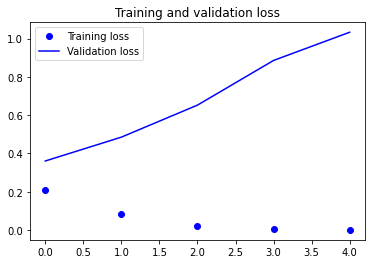

In [ ]:
mae = historyIMDBCnn.history['accuracy']
val_mae = historyIMDBCnn.history['val_accuracy']
loss = historyIMDBCnn.history['loss']
val_loss = historyIMDBCnn.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='Training accuracy')
plt.plot(epochs, val_mae, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Red Recurrente (LSTM)


In [ ]:
modelIMDBRnn = Sequential()
modelIMDBRnn.add(Embedding(max_features, 128, input_length=80))
modelIMDBRnn.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
modelIMDBRnn.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
modelIMDBRnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 80, 128)           2560000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


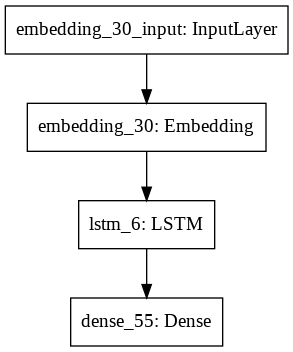

In [ ]:
modelIMDBRnn.summary()
plot_model(modelIMDBRnn, to_file='shared_input_layer.png')
Image(filename='shared_input_layer.png')

In [ ]:
print('Train...')
batch_size = 32

historyIMDBRnn = modelIMDBRnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = modelIMDBRnn.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 221s 9ms/step - loss: 0.4591 - accuracy: 0.7841 - val_loss: 0.3928 - val_accuracy: 0.8237
Epoch 2/5
25000/25000 [==============================] - 223s 9ms/step - loss: 0.2984 - accuracy: 0.8778 - val_loss: 0.4283 - val_accuracy: 0.8369
Epoch 3/5
25000/25000 [==============================] - 225s 9ms/step - loss: 0.2138 - accuracy: 0.9183 - val_loss: 0.4413 - val_accuracy: 0.8250
Epoch 4/5
25000/25000 [==============================] - 225s 9ms/step - loss: 0.1600 - accuracy: 0.9380 - val_loss: 0.4553 - val_accuracy: 0.8219
Epoch 5/5
25000/25000 [==============================] - 14s 572us/step
Test score: 0.5391351003980637
Test accuracy: 0.8213199973106384


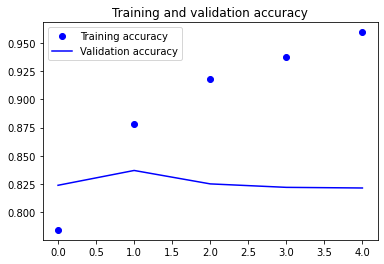

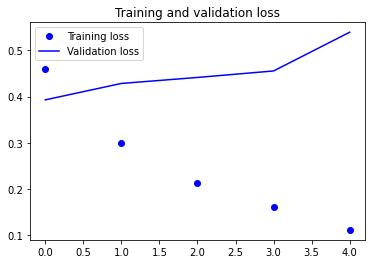

In [ ]:
mae = historyIMDBRnn.history['accuracy']
val_mae = historyIMDBRnn.history['val_accuracy']
loss = historyIMDBRnn.history['loss']
val_loss = historyIMDBRnn.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='Training accuracy')
plt.plot(epochs, val_mae, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Dataset 2: Air Passengers - Time-series forecasting

## Red Convolucional

In [ ]:
surveys_df = pd.read_csv("sample_data/air_passengers.csv")
#print(surveys_df.describe)
# split year-month
passengers = surveys_df["#Passengers"].values
p0 = passengers[0]
# passengers = passengers / 3000
#scaler = MinMaxScaler(feature_range=(0, 1))
#passengers = scaler.fit_transform(passengers)
# pas_mean = passengers.mean()
# pas_std =  passengers.std()
# passengers = (passengers - pas_std) / pas_mean
from sklearn.preprocessing import normalize
passengers = normalize(passengers[:,np.newaxis], axis=0).ravel()
p1 = passengers[0]
norm = p0 / p1

In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

X, y = split_sequence(passengers,10)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
# Split entre train y test
l = int(int(y.shape[0]) * 0.8)
X_train = X[:l]
X_test = X[l:]
y_train = y[:l]
y_test = y[l:]

In [ ]:
# if modelPas1D:
#   del modelPas1D
modelPas1D = Sequential()
modelPas1D.add(Conv1D(4, kernel_size=2, activation='relu', input_shape=(10,1)))
modelPas1D.add(Flatten())
modelPas1D.add(Dense(1, activation='linear'))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 9, 2)              6         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 19        
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
None


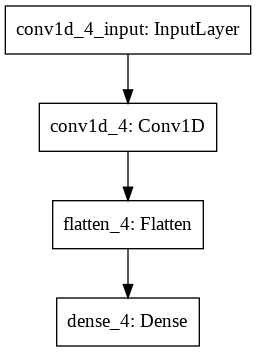

In [ ]:
#Compilando el modelo
modelPas1D.compile(loss='mse', optimizer='adam', metrics=['mae'])
modelPas1D.count_params()
print(modelPas1D.summary())
plot_model(modelPas1D, to_file='shared_input_layer.png')
Image(filename='shared_input_layer.png')

In [ ]:
#entrenando el modelo
historyPas1D = modelPas1D.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=1, verbose=1)

Train on 107 samples, validate on 27 samples
Epoch 1/500
107/107 [==============================] - 0s 4ms/step - loss: 4256.0050 - mae: 51.1318 - val_loss: 10410.9517 - val_mae: 86.9122
Epoch 2/500
107/107 [==============================] - 0s 2ms/step - loss: 2829.5369 - mae: 40.1615 - val_loss: 10416.8308 - val_mae: 87.2609
Epoch 3/500
107/107 [==============================] - 0s 2ms/step - loss: 2885.2408 - mae: 40.2603 - val_loss: 10663.8989 - val_mae: 89.3141
Epoch 4/500
107/107 [==============================] - 0s 2ms/step - loss: 2813.2244 - mae: 40.3849 - val_loss: 9923.5019 - val_mae: 83.6858
Epoch 5/500
107/107 [==============================] - 0s 2ms/step - loss: 2805.2821 - mae: 39.6246 - val_loss: 9921.8950 - val_mae: 83.8063
Epoch 6/500
107/107 [==============================] - 0s 2ms/step - loss: 2769.3036 - mae: 39.2875 - val_loss: 10179.4443 - val_mae: 86.1673
Epoch 7/500
107/107 [==============================] - 0s 2ms/step - loss: 2759.7243 - mae: 39.2329 - val

In [ ]:
# Mejor VAL MAE
#(0.1142 * pas_std) + pas_mean
norm * 0.0126

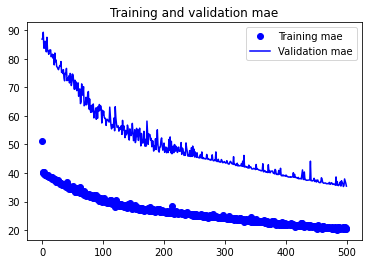

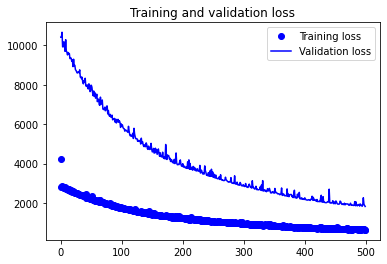

In [ ]:
mae = historyPas1D.history['mae']
val_mae = historyPas1D.history['val_mae']
loss = historyPas1D.history['loss']
val_loss = historyPas1D.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Red Recurrente (LSTM)

In [ ]:
#Creando el modelo de RNN LTSM
# if modelPasLSTM:
#   del modelPasLSTM
modelPasLSTM = Sequential()
modelPasLSTM.add(LSTM(3, input_shape=(10, 1)))
modelPasLSTM.add(Dense(1))

In [ ]:
#Compilando el modelo
modelPasLSTM.compile(loss='mse', optimizer='adam', metrics=['mae'])
modelPasLSTM.count_params()
print(modelPasLSTM.summary())
plot_model(modelPasLSTM, to_file='shared_input_layer.png')
Image(filename='shared_input_layer.png')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#entrenando el modelo
historyLSTM = modelPasLSTM.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=1, verbose=1)

Train on 107 samples, validate on 27 samples
Epoch 1/40
107/107 [==============================] - 4s 39ms/step - loss: 0.1503 - mae: 0.3486 - val_loss: 0.3027 - val_mae: 0.5371
Epoch 2/40
107/107 [==============================] - 4s 34ms/step - loss: 0.0414 - mae: 0.1649 - val_loss: 0.1107 - val_mae: 0.3132
Epoch 3/40
107/107 [==============================] - 4s 33ms/step - loss: 0.0169 - mae: 0.1056 - val_loss: 0.0670 - val_mae: 0.2347
Epoch 4/40
107/107 [==============================] - 4s 34ms/step - loss: 0.0148 - mae: 0.1002 - val_loss: 0.0650 - val_mae: 0.2311
Epoch 5/40
107/107 [==============================] - 4s 33ms/step - loss: 0.0137 - mae: 0.0958 - val_loss: 0.0533 - val_mae: 0.2048
Epoch 6/40
107/107 [==============================] - 3s 33ms/step - loss: 0.0128 - mae: 0.0935 - val_loss: 0.0501 - val_mae: 0.1974
Epoch 7/40
107/107 [==============================] - 4s 35ms/step - loss: 0.0119 - mae: 0.0898 - val_loss: 0.0444 - val_mae: 0.1831
Epoch 8/40
107/107 [====

In [ ]:
# Mejor VAL MAE
#0.0769 * 700
norm * 0.0172

In [ ]:
mae = historyLSTM.history['mae']
val_mae = historyLSTM.history['val_mae']
loss = historyLSTM.history['loss']
val_loss = historyLSTM.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Dataset 3: Secuencia de Fibonacci

In [ ]:
# Creacion del dataset artificial
# 1000 Secuencias estilo Fibonacci de largo 8 y 1 dato de salida
X = np.zeros((1000,8))
y = np.zeros((1000,1))
for i in range(1000):
  x1 = randint(0,101)
  x2 = randint(1,101)
  if x2 < x1:
    aux = x2
    x2 = x1
    x1 = aux
  X[i][0] = x1
  X[i][1] = x2
  for j in range(2,8):
    X[i][j] = X[i][j-2] + X[i][j-1]
  y[i] = X[i][6] + X[i][7]


n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

print(X[0])
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X = X/3000
y = y/3000
print(X[0])
print(y[0])

(1000, 8, 1)

In [ ]:
print(X[100])
y[100]

[[  57.]
 [  83.]
 [ 140.]
 [ 223.]
 [ 363.]
 [ 586.]
 [ 949.]
 [1535.]]


array([2484.])

## Red Convolucional

In [ ]:
# Split entre train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
print(X_train.shape)
y_train.shape

(800, 8, 1)


(800, 1)

In [ ]:
#Creando el modelo de red conv 1D
modelFib1D = Sequential()
modelFib1D.add(Conv1D(8, kernel_size=2, activation='relu', input_shape=(8,1)))
modelFib1D.add(Flatten())
modelFib1D.add(Dense(1))

In [ ]:
#Compilando el modelo
modelFib1D.compile(loss='mse', optimizer='adam', metrics=['mae'])
modelFib1D.count_params()
print(modelFib1D.summary())
plot_model(modelFib1D, to_file='shared_input_layer.png')
Image(filename='shared_input_layer.png')

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_35 (Conv1D)           (None, 7, 8)              24        
_________________________________________________________________
flatten_22 (Flatten)         (None, 56)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 57        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#entrenando el modelo
historyFib1D = modelFib1D.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=16, verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/1000
800/800 [==============================] - 0s 197us/step - loss: 0.6238 - mae: 0.5781 - val_loss: 0.6678 - val_mae: 0.6052
Epoch 2/1000
800/800 [==============================] - 0s 171us/step - loss: 0.6197 - mae: 0.5751 - val_loss: 0.6615 - val_mae: 0.5980
Epoch 3/1000
800/800 [==============================] - 0s 169us/step - loss: 0.6162 - mae: 0.5760 - val_loss: 0.6596 - val_mae: 0.6015
Epoch 4/1000
800/800 [==============================] - 0s 157us/step - loss: 0.6138 - mae: 0.5714 - val_loss: 0.6571 - val_mae: 0.6027
Epoch 5/1000
800/800 [==============================] - 0s 180us/step - loss: 0.6079 - mae: 0.5729 - val_loss: 0.6538 - val_mae: 0.6024
Epoch 6/1000
800/800 [==============================] - 0s 152us/step - loss: 0.6041 - mae: 0.5690 - val_loss: 0.6465 - val_mae: 0.5933
Epoch 7/1000
800/800 [==============================] - 0s 137us/step - loss: 0.6017 - mae: 0.5725 - val_loss: 0.6428 - val_mae: 0.5928
Ep

KeyboardInterrupt: ignored

In [ ]:
# Mejor VAL MAE
4.1906e-04 * 3000

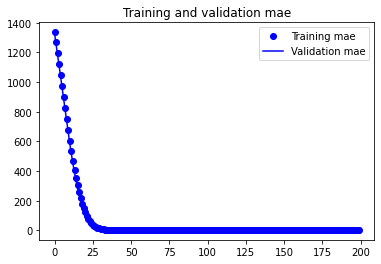

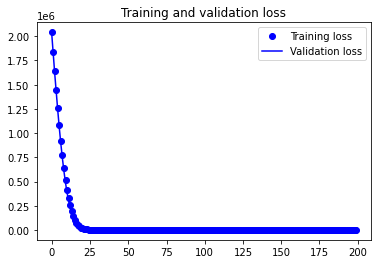

In [ ]:
mae = historyFib1D.history['mae']
val_mae = historyFib1D.history['val_mae']
loss = historyFib1D.history['loss']
val_loss = historyFib1D.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Red Recurrente (LSTM)

In [ ]:
# Split entre train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
print(X_train.shape)
y_train.shape

(800, 8, 1)


(800, 1)

In [ ]:
#Creando el modelo de RNN LTSM
del modelLSTM
modelLSTM = Sequential()
modelLSTM.add(LSTM(10, activation='relu', input_shape=(8, 1)))
modelLSTM.add(Dense(1)) 

In [ ]:
#Compilando el modelo
modelLSTM.compile(loss='mse', optimizer='adam', metrics=['mae'])
print(modelLSTM.summary())
plot_model(modelLSTM, to_file='shared_input_layer.png')
Image(filename='shared_input_layer.png')

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 3)                 60        
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#entrenando el modelo
historyLSTM = modelLSTM.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=16, verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 1s 1ms/step - loss: 3954373.3200 - mae: 1857.1801 - val_loss: 4241490.9400 - val_mae: 1934.7750
Epoch 2/200
800/800 [==============================] - 1s 876us/step - loss: 3954280.4300 - mae: 1857.1555 - val_loss: 4241395.4400 - val_mae: 1934.7504
Epoch 3/200
800/800 [==============================] - 1s 838us/step - loss: 3954187.9500 - mae: 1857.1301 - val_loss: 4241298.2000 - val_mae: 1934.7251
Epoch 4/200
800/800 [==============================] - 1s 866us/step - loss: 3954094.9400 - mae: 1857.1045 - val_loss: 4241202.1000 - val_mae: 1934.7003
Epoch 5/200
800/800 [==============================] - 1s 833us/step - loss: 3954002.0500 - mae: 1857.0781 - val_loss: 4241105.3200 - val_mae: 1934.6750
Epoch 6/200
800/800 [==============================] - 1s 957us/step - loss: 3953908.5000 - mae: 1857.0444 - val_loss: 4240957.4800 - val_mae: 1934.3978
Epoch 7/200
800/800 [=================

In [ ]:
# Mejor VAL MAE
0.0009447 * 3000

In [ ]:
mae = historyLSTM.history['mae']
val_mae = historyLSTM.history['val_mae']
loss = historyLSTM.history['loss']
val_loss = historyLSTM.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

array([[52.283875]], dtype=float32)